In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data_root = "path/normalized_data.csv"

df = pd.read_csv(data_root)

<Axes: xlabel='label', ylabel='count'>

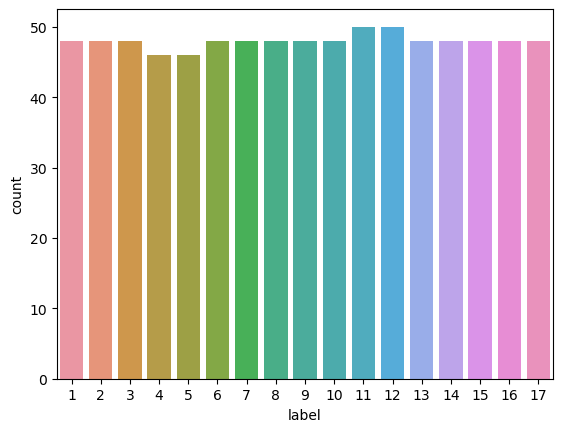

In [17]:
sns.countplot(x='label', data=df)

In [18]:
df.drop(['Bildname', 'image_width', 'image_height'], axis="columns", inplace=True)

X = df.drop('label', axis=1)
y = df.label

Testergebnisse:
Accuracy Score: 100.00%
Trainingszeit: 0.9136 Sekunden
Vorhersagezeit: 0.0158 Sekunden

CLASSIFICATION REPORT:

             1     2     3    4    5    6     7     8     9    10    11    12  \
precision  1.0   1.0   1.0  1.0  1.0  1.0   1.0   1.0   1.0   1.0   1.0   1.0   
recall     1.0   1.0   1.0  1.0  1.0  1.0   1.0   1.0   1.0   1.0   1.0   1.0   
f1-score   1.0   1.0   1.0  1.0  1.0  1.0   1.0   1.0   1.0   1.0   1.0   1.0   
support    9.0  10.0  10.0  9.0  9.0  9.0  10.0  10.0  10.0  10.0  10.0  10.0   

             13   14    15   16    17  accuracy  macro avg  weighted avg  
precision   1.0  1.0   1.0  1.0   1.0       1.0        1.0           1.0  
recall      1.0  1.0   1.0  1.0   1.0       1.0        1.0           1.0  
f1-score    1.0  1.0   1.0  1.0   1.0       1.0        1.0           1.0  
support    10.0  9.0  10.0  9.0  10.0       1.0      164.0         164.0  


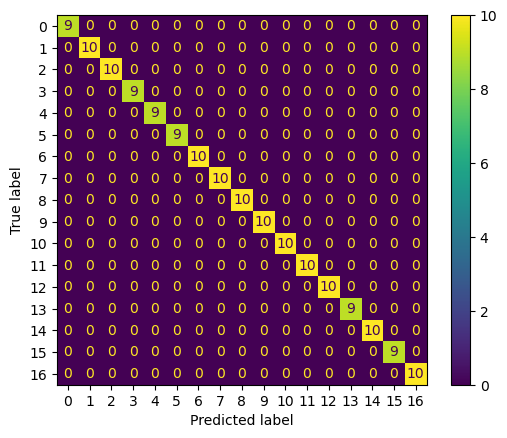

keine falschen Vorhersagen


In [19]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
#stratifiy, damit Klassen gleichverteilt sind

# Modell initialisieren
rf_clf = RandomForestClassifier(n_estimators=500)

# Trainingszeit messen
start_train = time.time()
rf_clf.fit(X_train, y_train)
end_train = time.time()
train_time = end_train - start_train

# Vorhersagezeit messen
start_pred = time.time()
pred = rf_clf.predict(X_test)
end_pred = time.time()
pred_time = end_pred - start_pred

# Klassifikationsbericht erstellen
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

# Ergebnisse ausgeben
print("Testergebnisse:")        
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print(f"Trainingszeit: {train_time:.4f} Sekunden")
print(f"Vorhersagezeit: {pred_time:.4f} Sekunden")
print("\nCLASSIFICATION REPORT:\n")
print(clf_report)

# Konfusionsmatrix anzeigen
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, pred))

cm_display.plot()
plt.show()

# Boolean-Index für falsche Vorhersagen
wrong_idx = pred != y_test

# Falsch vorhergesagte Zeilen aus X_test extrahieren
wrong_predictions = X_test[wrong_idx].copy()  # .copy(), um Änderungen zu vermeiden

# Tatsächliche und vorhergesagte Werte hinzufügen
wrong_predictions["Tatsächlicher Wert"] = y_test[wrong_idx]
wrong_predictions["Vorhergesagter Wert"] = pred[wrong_idx]

# Ausgabe der falschen Vorhersagen
if wrong_predictions.empty:
    print("keine falschen Vorhersagen")
else:
    print(wrong_predictions)


# Modell speichern
with open('random_forest_model_DFL.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

In [20]:
# Sehen wo das Modell gespeichert ist
import os
model_path = os.path.abspath('random_forest_model_DFL.pkl')
print (model_path)

/Users/luca/random_forest_model_DFL.pkl
